Stair Tower Built-up Tie Calcs  
E. Durham  2-Aug-2018

Notebook for 2d Interpolation of Table 2-10 from Timoshenko and Gere "Theory of Elastic Stability". The Table was orginally developed by A.N.Dinnik and represents factor $ m $ of Equ. 2-48 from that text.  
$  $  
Equ 2-48 $ P_{cr} = \frac{m E I_2}{l^2} $  

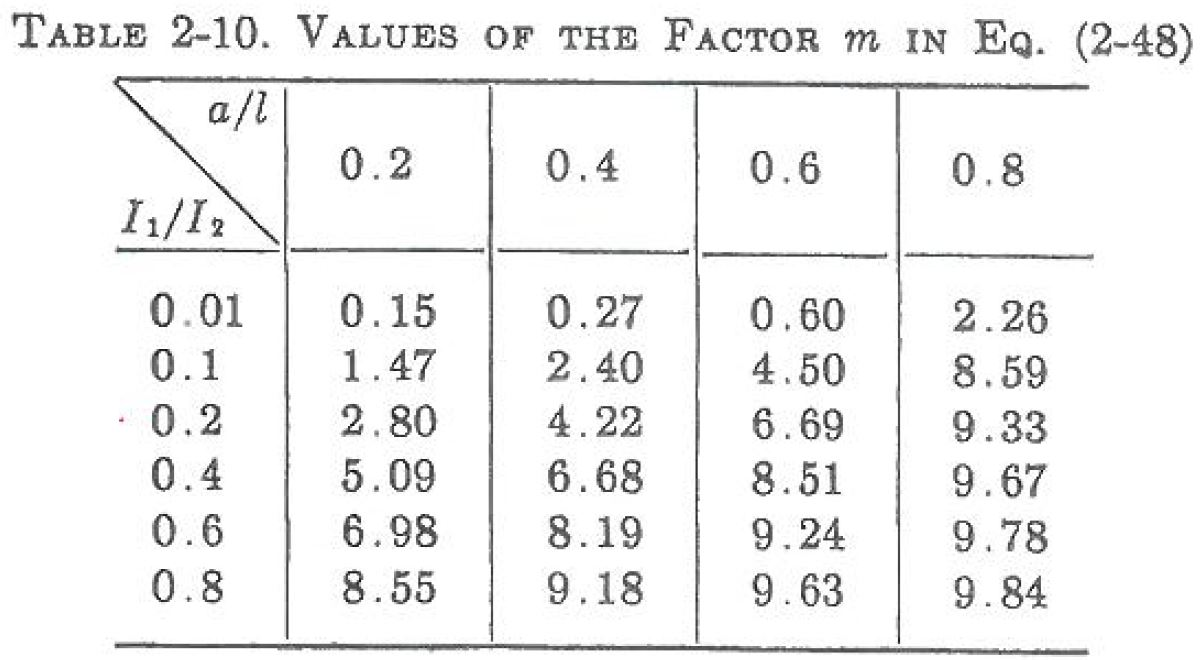

In [1]:
import numpy as np
from scipy import interpolate
import pylab as py
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.array([0.2, 0.4, 0.6, 0.8])  # a/l

In [3]:
y = np.array([0.01, 0.1, 0.2, 0.4, 0.6, 0.8])  # I_1/I_2

In [4]:
z = np.array([[0.15, 0.27, 0.60, 2.26],
              [1.47, 2.40, 4.50, 8.59],
              [2.80, 4.22, 6.69, 9.33],
              [5.09, 6.68, 8.51, 9.67],
              [6.98, 8.19, 9.24, 9.78],
              [8.55, 9.18, 9.63, 9.84]])  # factor tabulated by A.N.Dinnik

First, plot existing data for comparison with interpolated results

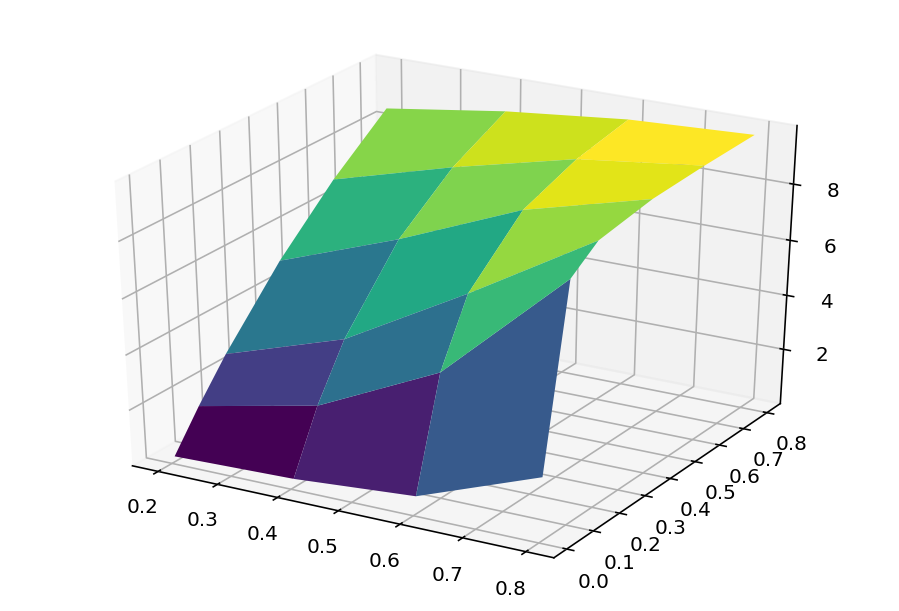

In [5]:
x, y = np.meshgrid(x, y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

Next, develop 2d interpolation using scipy.interpolate.bisplrep

In [6]:
xnew, ynew = np.mgrid[0.1:0.8:70j, 0.01:0.8:99j]
tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0, :], tck)

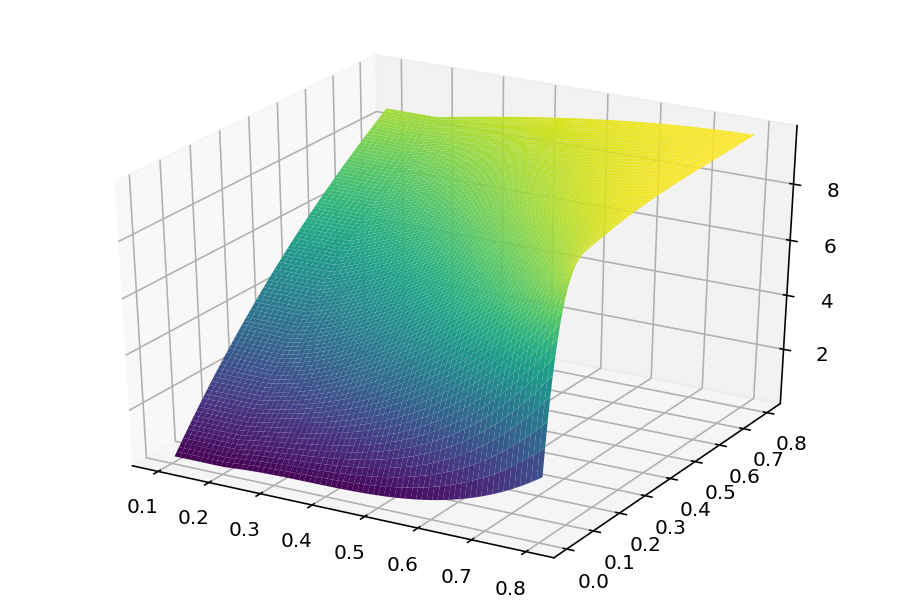

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xnew, ynew, znew, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

The 2d interpolated surface looks very similar to the surface plot of the original date.  
Now, we can used our 2d spline to calculate $ m $ at user specified values of $ \frac{I_1}{I_2} $ and $ \frac{a}{l} $  
$  $  

In [8]:
round(interpolate.bisplev(0.5, 0.331, tck),2)

7.01

Note: The above interpolates between values published in Table 2-10. It cannot extrapolate values outside the bounds of the table. Attempts to use it to extrapolate values outside the bounds of the table will yield meaningless results.  
E.Durham  
4-Aug-2018